# Inspiration

I came across an intriguing article on Yahoo Finance, sparking my interest as a junior data analyst. My primary goal was to examine the relationships between these assets, considering how one might diversify a portfolio for potential risk mitigation. It's essential to note that this analysis is purely for learning and curiosity purposes. This project is not intended to provide financial advice. It's an exploration driven by curiosity and a desire to expand my skills as a data analyst.

- https://finance.yahoo.com/news/jp-morgan-top-15-stock-190553259.html

# The plan

1. Import the Packages:
     - Utilize essential libraries for data analysis and visualization.
2. Get the Data using yfinance
    - Download 2023 data for selected assets.
    - Narrow down the dataset and perform initial exploratory analysis.
3. Analyze the Data:
    - Identify, visualize trends in asset performance.
    - Calculate rates of return, assess volatility, and estimate risk.
4. Correlation Analysis:
   - Decide between standardization or normalization of data.
   - Select appropriate correlation metrics for analysis.
   - Identify uncorrelated assets or pairs with minimal correlation.
5. Portfolio Simulation:
   - Evaluate the hypothetical portfolio value if $100 was invested equally in all 15 assets at the beginning of 2023.

# Import the packages

In [39]:
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Get the data

In [104]:
# Company name-ticker pairs
stocks = {
'WellsFargo': 'WFC', # finance
'Mastercard': 'MA', # finance
'NextEraEnergy': 'NEE', # energy
'Exxon': 'XOM', # energy
'Tesla': 'TSLA', # energy, automobile
'Johnson': 'JNJ', # healthcare
'UnitedHealth': 'UNH', # healthcare
'NXP': 'NXPI', # semiconductor
'Nvidia': 'NVDA', # semiconductor
'Apple': 'AAPL', # technology
'Microsoft': 'MSFT', # technology
'Regeneron': 'REGN', # biotechnology
'Intuit': 'INTU', # financialtechnology
'Meta': 'META', # socialmedia
'Lowe': 'LOW' # retail
}

In [42]:
names = list(stocks.keys())

In [43]:
tickers = list(stocks.values())

In [45]:
data = yf.download(tickers, start = '2023-01-01', end = '2023-12-31', auto_adjust = True)

[*********************100%%**********************]  15 of 15 completed


In [46]:
# Narrow down to the open column
data = data.Open
data

,AAPL,INTU,JNJ,LOW,MA,META,MSFT,NEE,NVDA,NXPI,REGN,TSLA,UNH,WFC,XOM
Date,,,,,,,,,,,,,,,
2023-01-03,129.555841,393.827399,170.971865,197.364324,347.837678,122.820000,240.943573,82.053157,148.444141,156.493012,721.859985,118.470001,517.341271,40.347259,106.155630
2023-01-04,126.184691,394.700956,173.621450,197.305517,349.259008,127.379997,230.238500,82.043433,145.605406,155.023874,728.190002,109.110001,510.947626,40.977530,101.340036
2023-01-05,126.423353,383.552305,173.747625,195.219156,353.960314,126.129997,225.203146,81.314031,144.845723,152.888720,724.690002,110.510002,493.579057,41.287823,102.829189
2023-01-06,125.309594,377.486516,174.824915,196.619859,355.719457,128.970001,221.040049,81.265403,144.675810,152.643863,730.739990,103.000000,484.298744,41.297514,106.445719
2023-01-09,129.744788,389.053045,174.019378,198.275255,369.975761,131.160004,224.459731,81.343198,152.772202,158.951361,693.130005,118.959999,485.106594,41.811430,107.954219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,195.179993,622.830017,155.250000,224.039993,424.750000,355.579987,373.679993,59.959999,491.950012,230.899994,846.270020,256.760010,519.880005,49.660000,102.309998
2023-12-26,193.610001,625.169983,155.000000,222.899994,425.000000,354.989990,375.000000,59.680000,489.679993,230.000000,848.530029,254.490005,519.880005,49.160000,102.739998
2023-12-27,192.490005,623.989990,155.500000,222.520004,423.000000,356.070007,373.690002,59.910000,495.109985,232.839996,847.659973,258.350006,519.750000,49.410000,102.040001


In [69]:
# Is there any NaN?
data.isnull().sum().sum()

0

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    250 non-null    float64
 1   INTU    250 non-null    float64
 2   JNJ     250 non-null    float64
 3   LOW     250 non-null    float64
 4   MA      250 non-null    float64
 5   META    250 non-null    float64
 6   MSFT    250 non-null    float64
 7   NEE     250 non-null    float64
 8   NVDA    250 non-null    float64
 9   NXPI    250 non-null    float64
 10  REGN    250 non-null    float64
 11  TSLA    250 non-null    float64
 12  UNH     250 non-null    float64
 13  WFC     250 non-null    float64
 14  XOM     250 non-null    float64
dtypes: float64(15)
memory usage: 31.2 KB


In [48]:
data.describe()

,AAPL,INTU,JNJ,LOW,MA,META,MSFT,NEE,NVDA,NXPI,REGN,TSLA,UNH,WFC,XOM
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,171.829842,474.841134,157.826799,207.708003,384.418699,260.879041,312.485386,68.628654,365.087902,188.794431,783.673320,217.075040,495.489678,41.872611,106.788780
std,17.701920,62.732632,6.423192,12.612949,20.518518,63.394325,41.598570,8.045327,108.505837,18.706570,44.657366,42.282592,25.246435,3.130712,4.706616
min,125.309594,377.486516,144.929389,184.800003,342.100388,122.820000,221.040049,48.664005,144.675810,152.643863,676.369995,103.000000,448.716471,35.130176,96.575362
25%,160.902305,421.061445,153.444851,198.146948,368.669208,208.942497,281.518400,61.724998,268.236569,173.855812,747.877518,186.375004,476.958811,39.734200,103.268891
50%,175.014425,454.754340,157.259972,204.551763,383.628282,285.475006,323.869344,71.863298,416.301222,187.242170,785.370026,223.564995,487.180470,41.353312,106.227834
75%,186.307627,518.516813,161.389019,219.170181,399.343236,312.322502,336.199390,73.805767,457.638987,201.548453,824.452484,251.787495,513.909313,44.025120,109.915784
max,198.020004,630.739990,174.824915,235.576330,426.679993,359.700012,383.760010,83.570324,502.074482,235.169998,877.909973,296.040009,551.349976,50.410000,118.892809


<Axes: >

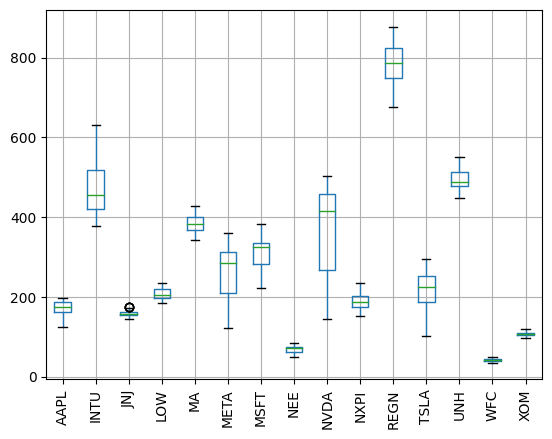

In [49]:
data.boxplot(rot=90)

## Observations
    - The dataset is ready and contains only floats
    - There were 250 trading days in this period of time
    - Nvidia had the highest volatility throughout the year based on the standard deviation
    - Wells Fargo had the lowest volatility throughout the year based on the standard deviation
    - Regneron had the maximum stock value from the list
    - Wells Fargo had the lowest stock value from the list
    

# Analyze the data

## Trends

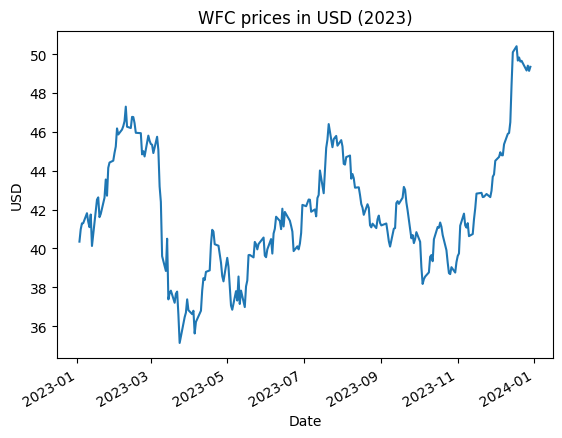

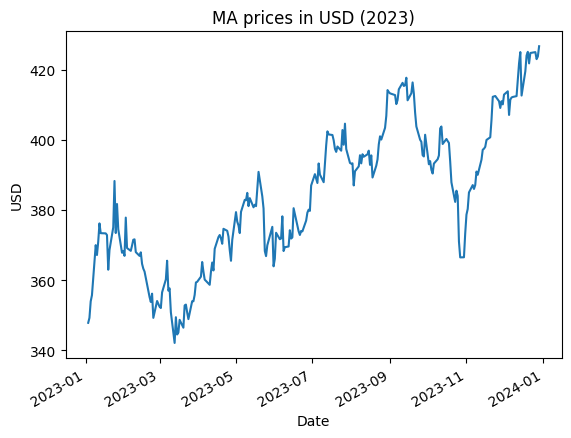

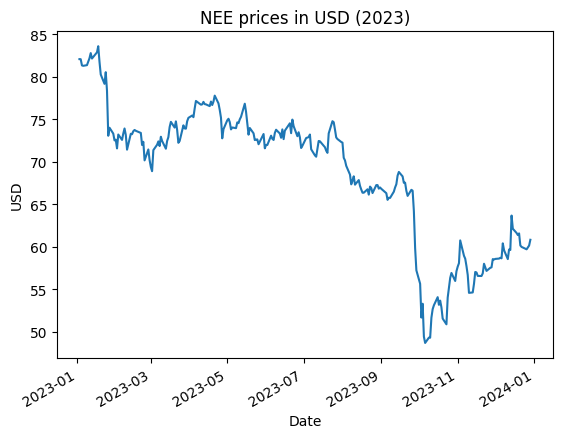

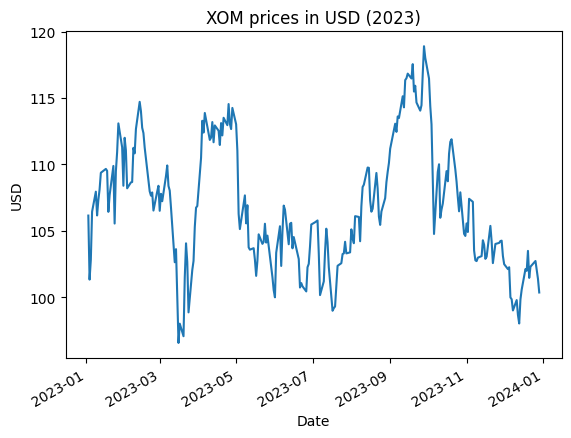

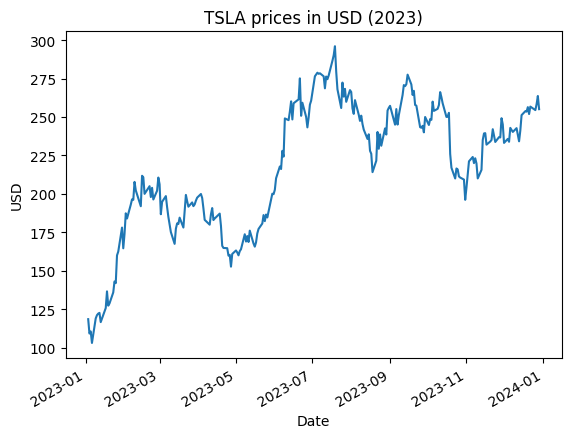

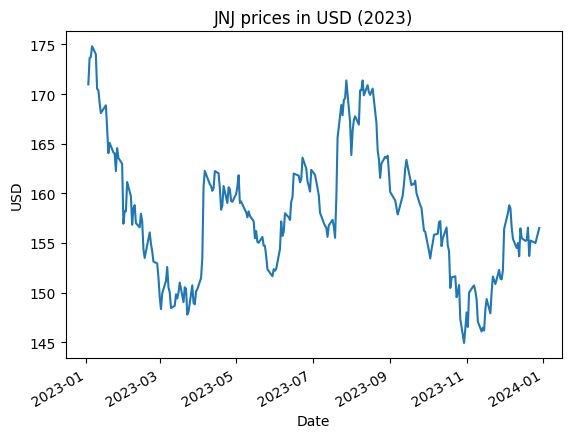

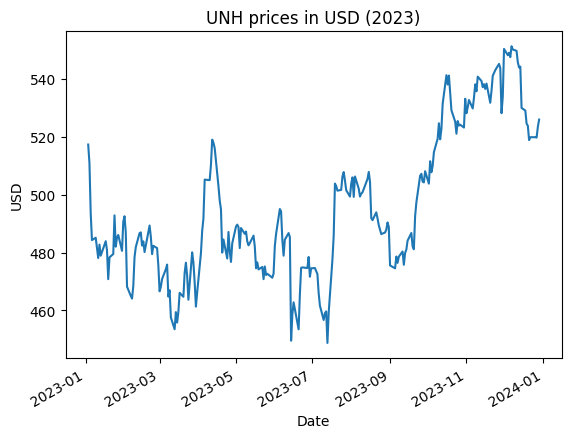

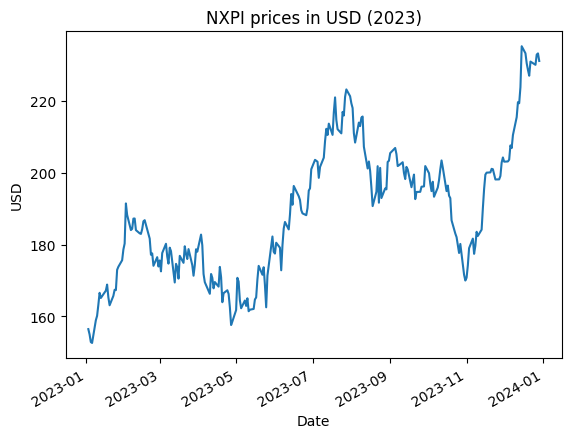

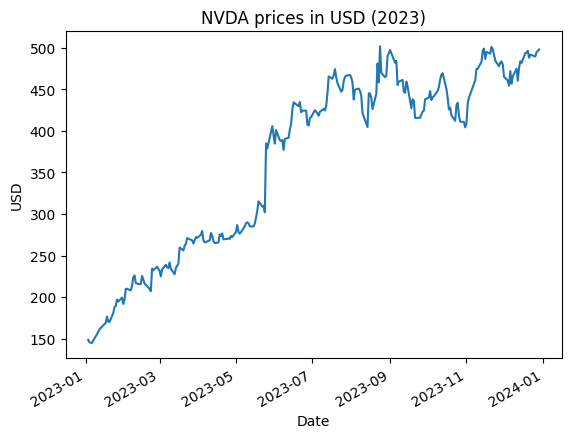

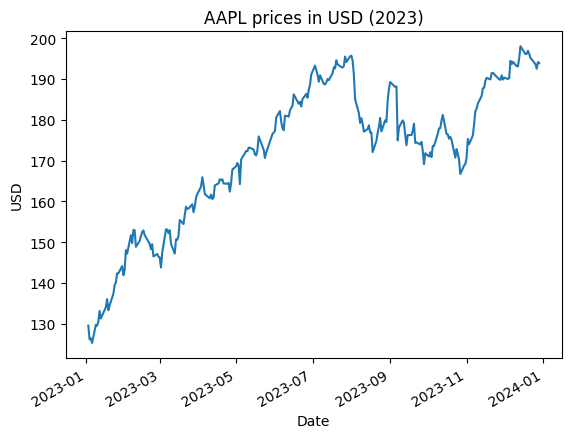

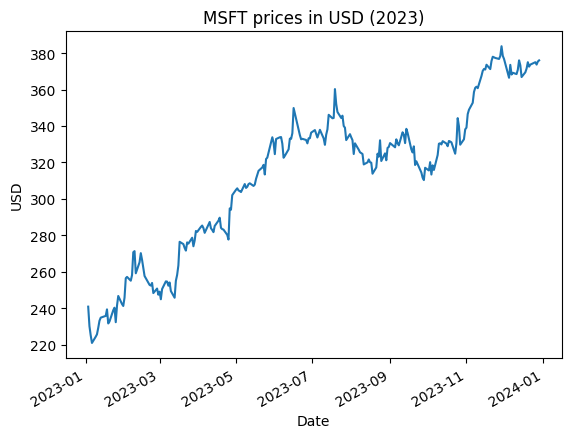

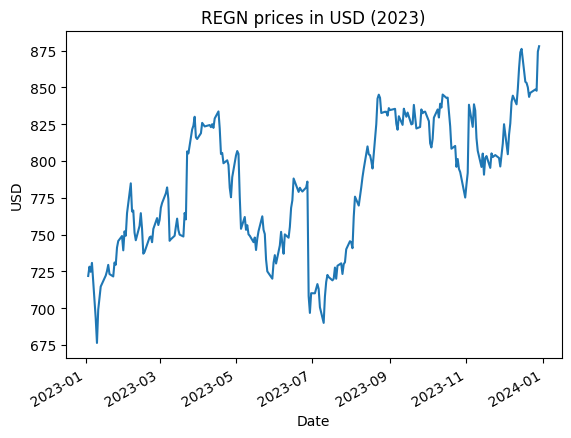

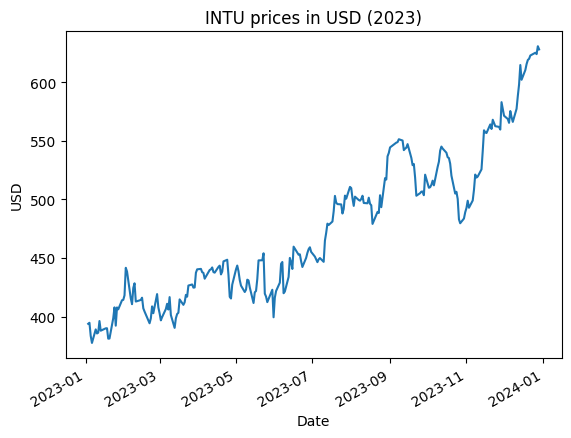

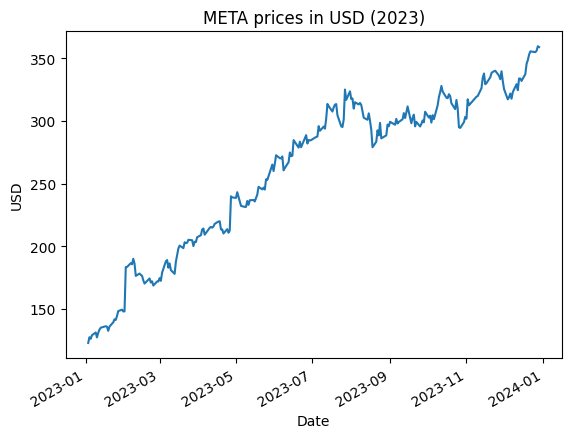

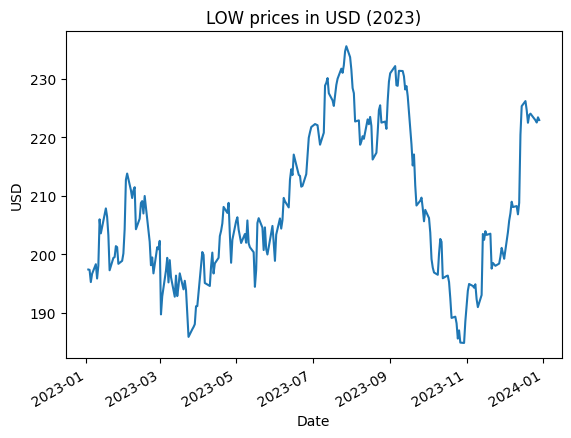

In [50]:
for asset in tickers:
    data[asset].plot()
    plt.title(str(asset) + ' prices in USD (2023)')
    plt.xlabel('Date')
    plt.ylabel('USD')
    plt.show()

## Simple rate of return

In [52]:
# Calculate daily returns to calculate volatility and risk
returns_data = data.pct_change()
# Drop the first row (NaN)
returns_data = returns_data.dropna()

In [53]:
# Calculate the cumulative returns for the entire year * 100 for percentage
returns_2023 = ((1 + returns_data).prod() - 1) * 100
returns_2023_df = pd.DataFrame(returns_2023, columns = ['RoR (%)'])
returns_2023_df.sort_values(by = 'RoR (%)', ascending = False)

,RoR (%)
NVDA,235.567306
META,192.289522
TSLA,115.328778
INTU,59.465802
MSFT,56.053135
AAPL,49.665189
NXPI,47.655161
MA,22.666410
WFC,22.313137
REGN,21.617764


## Volatility

In [54]:
# Calculate volatility for each asset
volatility = returns_data.std()
volatility_df = pd.DataFrame(volatility, columns = ['Volatility'])
volatility_df.sort_values(by = 'Volatility')

,Volatility
JNJ,0.010374
MA,0.011628
AAPL,0.013114
UNH,0.013193
REGN,0.014937
LOW,0.015043
MSFT,0.016136
XOM,0.016641
NEE,0.017446
WFC,0.017486


## Risk

In [55]:
# Calculate downside risk (example: standard deviation of negative returns)
downside_returns = returns_data.where(lambda x: x < 0).std()
risk_df = pd.DataFrame(downside_returns, columns = ['Risk'])
risk_df.sort_values(by = 'Risk')


,Risk
JNJ,0.006122
MA,0.008333
MSFT,0.009465
AAPL,0.009590
UNH,0.009726
LOW,0.009754
XOM,0.010959
META,0.011395
NXPI,0.011398
REGN,0.011911


# Correlation Analysis

## Normalize the data

    - The minimum and maximum values of different stocks are very different
    - Standard deviation range is very large
    - Standardization is not the best way to deal with the differences in scale, because it is not a Gaussian-distribution > I need to normalize the dataset
    - Throughout the normalization process we usually had to deal with outliers first, but in this dataset there are no extreme outliers, so there is no need to remove them

In [56]:
scaler = MinMaxScaler()
norm_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
norm_data.sample(5)

,AAPL,INTU,JNJ,LOW,MA,META,MSFT,NEE,NVDA,NXPI,REGN,TSLA,UNH,WFC,XOM
197,0.704271,0.641071,0.389250,0.225446,0.687395,0.826663,0.671948,0.154303,0.855948,0.511669,0.825841,0.761759,0.902403,0.390933,0.579069
167,0.879257,0.659004,0.508712,0.908761,0.841108,0.745314,0.673543,0.519460,0.987299,0.639721,0.784857,0.799109,0.261161,0.396122,0.654552
109,0.766151,0.173182,0.437156,0.477370,0.322645,0.589581,0.630571,0.718519,0.687265,0.407699,0.365932,0.756683,0.348087,0.425410,0.449333
9,0.120629,0.049207,0.800992,0.453472,0.369242,0.056400,0.091190,0.979383,0.067821,0.176360,0.227052,0.117592,0.342949,0.482951,0.586556
82,0.606422,0.260813,0.525756,0.423585,0.408822,0.508105,0.521013,0.755521,0.397443,0.219567,0.646770,0.305015,0.398757,0.256097,0.647509


### Spearman's correlation
Doesn't have to be a Gaussian distribution, and great if we are uncertain of the possible relationship

In [58]:
# Get the correlation matrix
spearman_corr = data.corr(method = 'spearman')

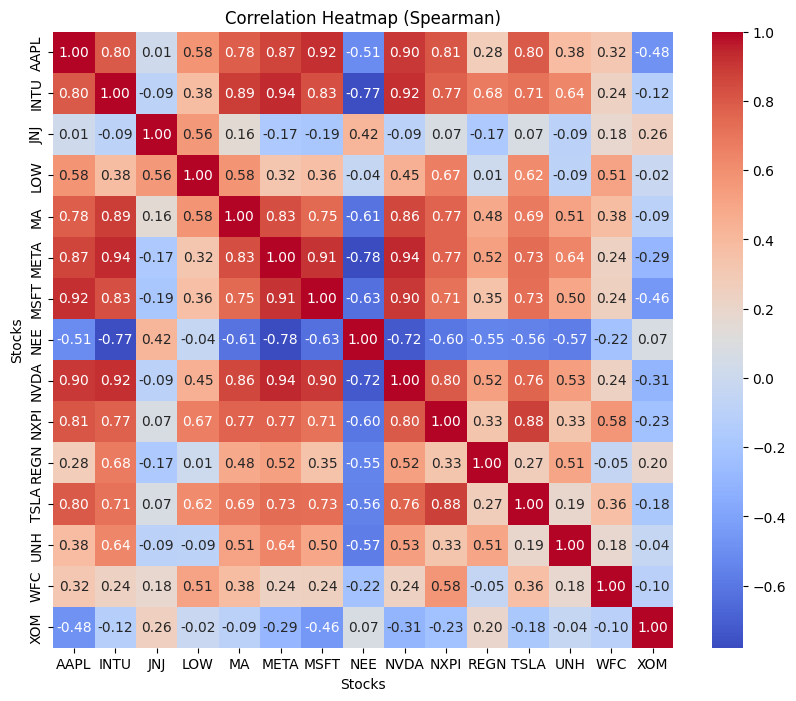

In [59]:
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Spearman)')
plt.xlabel('Stocks')
plt.ylabel('Stocks')
plt.show()

<Axes: >

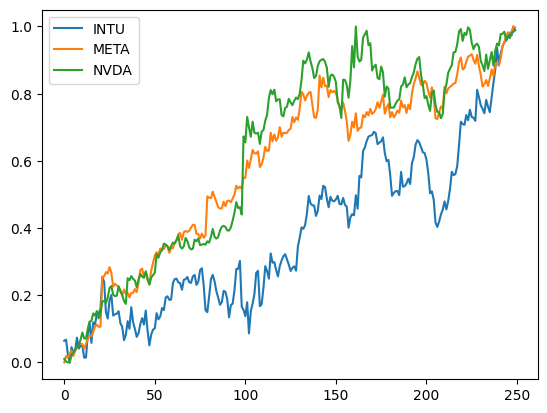

In [60]:
# Test the fit
norm_data[['INTU', 'META', 'NVDA']].plot()

### Pearson's correlation
Great to evaluate the relationship between more than 2 variables

In [61]:
# Get the correlation matrix
pearson_corr = data.corr(method = 'pearson')

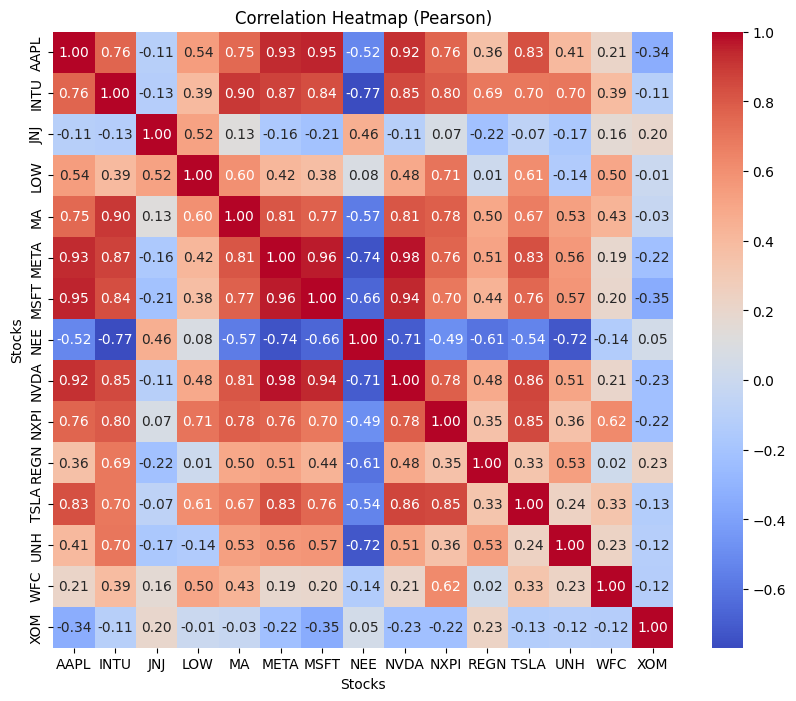

In [62]:
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Pearson)')
plt.xlabel('Stocks')
plt.ylabel('Stocks')
plt.show()

<Axes: >

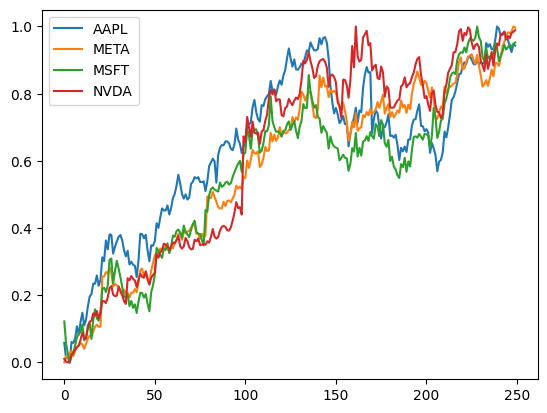

In [63]:
# Test the fit
norm_data[['AAPL', 'META', 'MSFT', 'NVDA']].plot()

### Pearson correlation looks much more accurate

# Conslusion

In [71]:
# Get pairs with correlation less than x
x = 0.5
low_corr_pairs = (pearson_corr < x)

# Extract the pairs where correlation is less than x
low_corr_assets = {}

for asset in low_corr_pairs:
    low_corr_assets[asset] = low_corr_pairs.index[low_corr_pairs[asset]].tolist()

# Display the pairs with correlation less than x
for asset, correlated_assets in low_corr_assets.items():
    if len(correlated_assets) > 0:
        print(f"Assets not correlated with '{asset}': {', '.join(correlated_assets)}")

Assets not correlated with 'AAPL': JNJ, NEE, REGN, UNH, WFC, XOM
Assets not correlated with 'INTU': JNJ, LOW, NEE, WFC, XOM
Assets not correlated with 'JNJ': AAPL, INTU, MA, META, MSFT, NEE, NVDA, NXPI, REGN, TSLA, UNH, WFC, XOM
Assets not correlated with 'LOW': INTU, META, MSFT, NEE, NVDA, REGN, UNH, WFC, XOM
Assets not correlated with 'MA': JNJ, NEE, REGN, WFC, XOM
Assets not correlated with 'META': JNJ, LOW, NEE, WFC, XOM
Assets not correlated with 'MSFT': JNJ, LOW, NEE, REGN, WFC, XOM
Assets not correlated with 'NEE': AAPL, INTU, JNJ, LOW, MA, META, MSFT, NVDA, NXPI, REGN, TSLA, UNH, WFC, XOM
Assets not correlated with 'NVDA': JNJ, LOW, NEE, REGN, WFC, XOM
Assets not correlated with 'NXPI': JNJ, NEE, REGN, UNH, XOM
Assets not correlated with 'REGN': AAPL, JNJ, LOW, MA, MSFT, NEE, NVDA, NXPI, TSLA, WFC, XOM
Assets not correlated with 'TSLA': JNJ, NEE, REGN, UNH, WFC, XOM
Assets not correlated with 'UNH': AAPL, JNJ, LOW, NEE, NXPI, TSLA, WFC, XOM
Assets not correlated with 'WFC': AAP

Based on my findings, JP Morgan's top 15 would make a great and diversed portfolio. It is not a big surprise that they were so successfil in 2023 even though not every asset was profitable in this period of time. 

## What would my portfolio be worth if I had invested $100 to all of these 15 assets at the beginning of 2023?

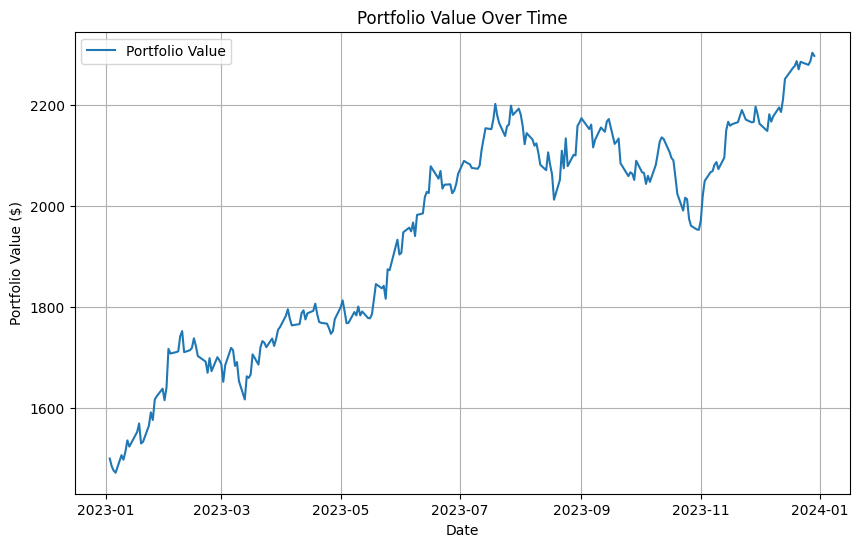

The portfolio value on the last day is: $2297.44
The profit: $797.44


In [103]:
number_of_assets = 15  # $100 per asset
investment_per_asset = 100
initial_investment = number_of_assets * investment_per_asset # Total

# Calculate the daily portfolio value (rate/starting date rate) * initial investment
portfolio_value = (data / data.iloc[0]) * (initial_investment / number_of_assets)

# Calculate the total portfolio value for each day (by row)
total_portfolio_value = portfolio_value.sum(axis=1)

# Plotting the total portfolio value
plt.figure(figsize=(10, 6))
plt.plot(total_portfolio_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()

# Display the portfolio value on the last day
portfolio_value_end = total_portfolio_value[-1]
print(f"The portfolio value on the last day is: ${portfolio_value_end:.2f}")
print(f"The profit: ${portfolio_value_end - initial_investment:.2f}")